# Problemi di Ottimizzazione

Tra le applicazioni più importanti dell'Algebra Lineare c'è senza dubbio l'Ottimizzazione. Infatti, praticamente tutti i problemi *reali* risolvibili computazionalmente possono essere in qualche modo riformulati come problemi di ottimizzazione, partendo dalla Ricerca Operativa (minimizzazione del percorso sottoposto a vincoli, distribuzione di carico, ...), per arrivare all'ingegneria (ottimizzazione di forma, distribuzione di forze nelle strutture, ...), fino al più moderno addestramento di modelli di Intelligenza Artificiali e l'ottimizzazione di parametri in modelli fisici ed economici.

Tutti questi problemi possono essere riscritti come:

$$
\min_{x \in \Omega} f(x),
$$

dove la funzione $f: \Omega \to \mathbb{R}$, detta **funzione obiettivo**, descrive la quantità che si vuole ottimizzare, in funzione di alcuni valori, detti **variabili** o **parametri**, indicati semplicemente con il simbolo di $x$. L'insieme $\Omega$, spesso detto **insieme dei valori accettabili** o **insieme dei vincoli**, descrive sotto quali ipotesi la soluzione $x$ del problema deve sottostare per essere dichiarata *accettabile*. 

Consideriamo, per esempio, un classico problema di Ricerca Operativa in cui si vuole minimizzare la lunghezza del percorso che passa per un determinato insieme di punti (particolarmente interessante per le sue applicazioni nelle reti di distribuzione per la consegna a domicilio, ad esempio, oltre che per le sue interessanti proprietà matematiche), problema spesso noto in letteratura come *problema del Commesso Viaggiatore*.

In questo caso, possiamo immaginare la variabile $x \in \Omega \subset \mathbb{R}^n$ come l'elenco (ordinato) dei nodi che si devono visitare, la funzione obiettivo $f(x)$ come la lunghezza totale del percorso descritta da $x$, ovvero

$$
    f(x) = \sum_{i=1}^{n-1} d(x_i, x_{i+1}),
$$

mentre $\Omega$ rappresenta l'elenco dei vincoli a cui siamo sottoposti, quindi il fatto che tutti i nodi devono essere visitati tutti e solo una volta, oltre che magari alcuni vincoli fisici come la possibilità o meno di raggiungere un certo nodo $x_i$ partendo dal noto $x_j$ (situazione tipica quando i *nodi* rappresentano delle abitazioni che sono da raggiungere, ad esempio, da un dato mezzo di trasporto).

```{note}
Quanto appena descritto rappresenta un procedimento chiamato **modellizzazione matematica**, in cui un processo viene descritto matematicamente assegnando delle variabili e delle funzioni ai vari elementi del processo. Questo tipo di approccio è tipico di praticamente qualunque applicazione, ed è necessario prenderci la mano per capire bene il resto del corso.
```

## Classificazione dei problemi di ottimizzazione
In base alla forma dell'insieme $\Omega$ dei vincoli, oltre che alle proprietà matematiche della funzione obiettivo $f(x)$, i problemi di ottimizzazione si classificano in varie categorie. 

Partendo dalla scelta di $\Omega$, riconosciamo due classi principali:

* Se $\Omega = \mathbb{R}^n$, allora diciamo che il problema è **svincolato** (*unconstrained*, in Inglese)
* Se $\Omega \subset \mathbb{R}^n$, allora diciamo che il problema è **vincolato** (*constrained*, in Inglese)

Nella classe dei problemi vincolati, un caso particolare è dettato dalla situazione in cui $\Omega \subseteq \mathbb{Z}^n$. I problemi di questo tipo sono detti **discreti**. Tutti gli altri vengono in genere detti **continui**, di riflesso.

Per quanto riguarda le proprietà della funzione obiettivo $f(x)$, invece, abbiamo:

* Se $f(x)$ è una funzione almeno derivabile ($f \in C^1(\Omega)$), il problema è detto **smooth**,
* Se $f \notin C^1(\Omega)$, ovvero $f(x)$ non è derivabile in almeno un punto di $\Omega$, allora il problema si dice **non-smooth**.

Ulteriori classificazioni si hanno considerando altre proprietà della funzione obiettivo. Ad esempio:

* Se $f(x) = x^T w$ è una funzione lineare in $x$, allora il problema è detto **lineare**,
* Se $f(x) = x^T A x + x^T b$ è una funzione quadratica in $x$, allora il problema è detto **quadratico**.

```{note}
Le funzioni quadratiche sono particolarmente importanti nell'ambito dell'Algebra Lineare, poiché ad esempio i problemi ai minimi quadrati (già accennati a lezione), ricadono in questa tipologia.
```

<ins>La situazione che consideriamo in questo corso, da ora in avanti, è quella di problemi di ottimizzazione **smooth** e **svincolata**.</ins>

## Un po' di codice
Vediamo ora un po' di codice. Come abbiamo detto, in questo corso andremo sempre a considerare ottimizzazione svincolata, per cui $\Omega = \mathbb{R}^n$, che quindi non andrà definito nell'implementazione.

Per quanto riguarda la funzione $f(x)$, questa viene spesso dichiarata come una normale funzione Python, che prende in input un vettore $x$ che assumiamo **sempre** essere un `ndarray` di `numpy`. La funzione $f(x)$ agirà quindi su questo array $x$ per produrre come risultato **un numero reale**.

Per semplicità, consideriamo la funzione, con $x \in \mathbb{R}$ (i.e. $n=1$):

$$
f(x) = (x-1)^2 + e^x.
$$

In [1]:
# Importiamo le librerie utili
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x) = (x-1)^2 + e^x
def f(x):
    y = (x-1)**2 + np.exp(x)
    
    return y

Essendo una funzione da $\mathbb{R}$ a $\mathbb{R}$, possiamo visualizzarla semplicemente sul piano cartesiano. 

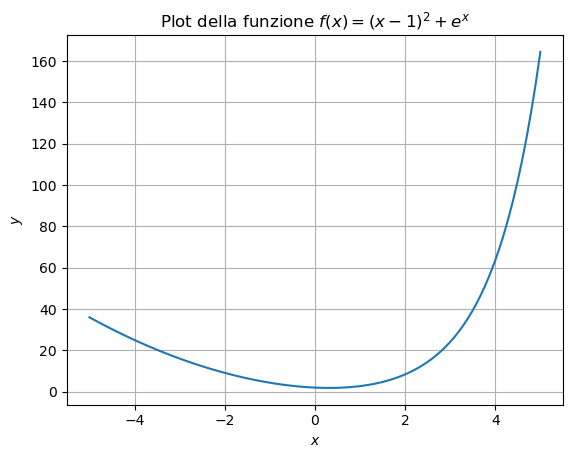

In [2]:
# Definiamo un'intervallo di riferimento
a, b = -5, 5
N = 100 # Numero di punti

# Definiamo una discretizzazione dell'asse x
xx = np.linspace(a, b, N)

# Calcoliamo il rispettivo valore di y
yy = f(xx)

# Plot
plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

Bisogna qui osservare alcuni punti importanti:

- L'intervallo $[a, b]$ scelto deve essere selezionato dallo studente ed è non vincolante. Chiaramente, la funzione è definita su tutto $\mathbb{R}$ ma il plot può mostrare solo una parte predefinita di asse.
- La discretizzazione dell'asse $x$ e i rispettivi valori dell'asse $y$ sono salvati in variabili `xx` e `yy` (notazione che useremo per tutto il resto del corso). Questo perché esse rappresentato delle vabili *fittizie*, costruite al **solo** scopo di rappresentare il grafico (che, come abbiamo detto nel rispettivo punto del corso) richiede di definire una discretizzazione degli assi.

Come detto, il nostro fine ultimo è quello di risolvere:

$$
\min_{x \in \mathbb{R}^n} f(x).
$$

La funzione appena descritta ha come **unico** punto di minimo il valore $x^* \approx 0.31492$. Andiamo a rappresentare tale punto sul grafico.

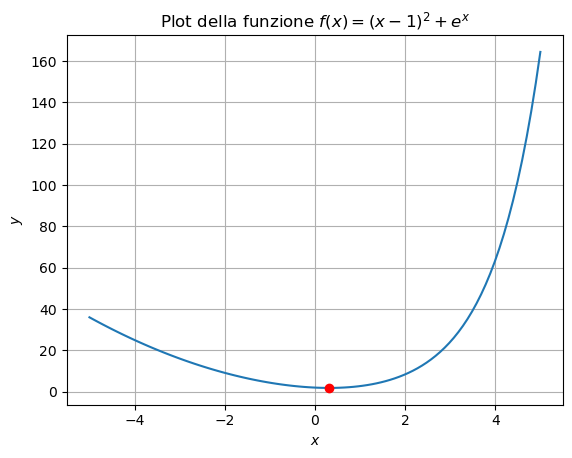

In [3]:
# Definisco il punto di minimo
x_min = 0.31492
y_min = f(x_min)

# Plot
plt.plot(xx, yy, '-')
plt.plot(x_min, y_min, 'ro')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

## Classificazione dei punti di minimo (e massimo)
Chiaramente, non tutte le funzioni sono *belle* come quella appena descritta: per via della sua forma a "U", essa mostra infatti un unico punto di minimo e nessun punto di massimo.

La maggior parte delle funzioni reali avrà forma più simile a quella rappresentata di seguito:

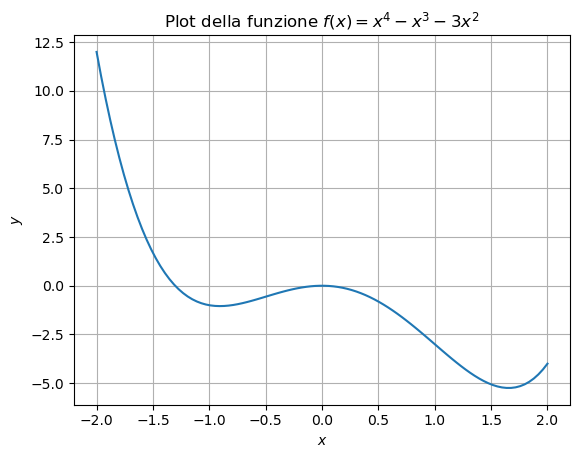

In [28]:
def f(x):
    y = x**4 - x**3 - 3 * x**2
    return y

# Plot
a, b = -2, 2
N = 100

xx = np.linspace(a, b, N)
yy = f(xx)

plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = x^4 - x^3 - 3 x^2$')
plt.show()

Che presenta vari punti di minimo e un punto di massimo. Chiaramente, quando sviluppiamo un algoritmo di ottimizzazione, puntiamo a trovare il *miglior* minimo possibile (in questo caso, quello vicino ad $x = 1.5$), ma in alcune situazioni possiamo tranquillamente accontentarci del minimo che si trova attorno ad $x = - 1$. Diamo un po' di definizioni con lo scopo di caratterizzare questi punti:

Sia $f: \mathbb{R}^n \to \mathbb{R}$ una funzione. Allora:
* $x^* \in \mathbb{R}^n$ si dice **punto di minimo globale** se $f(x^*) \leq f(x)$, $\forall x \in \mathbb{R}^n$;
* $x^* \in \mathbb{R}^n$ si dice **punto di massimo globale** se $f(x^*) \geq f(x)$, $\forall x \in \mathbb{R}^n$;
* $x^* \in \mathbb{R}^n$ si dice **punto di minimo locale** se $\exists \epsilon > 0$ tale che $f(x^*) \leq f(x)$, $\forall x \in (x^* - \epsilon, x^* + \epsilon)$;
* $x^* \in \mathbb{R}^n$ si dice **punto di massimo locale** se $\exists \epsilon > 0$ tale che $f(x^*) \geq f(x)$, $\forall x \in (x^* - \epsilon, x^* + \epsilon)$;

In particolare, per quanto riguarda la funzione sopra, nell'intervallo $[-2, 2]$ riconosciamo:
* Un punto di minimo globale $x \approx 1.5$,
* Un punto di massimo globale in $x = -2$,
* Un punto di minimo locale in $x = 1$,
* Due punti di massimo locale: $x=0$ e $x=2$.

Sfortunatamente, è possibile dimostrare un risultato *scoraggiante* dal punto di vista teorico: il problema di riconoscere, data una funzione qualunque, il suo punto di minimo **globale**, è un problema NP-Hard e quindi, difatto, impossibile da risolvere in generale.

## Funzioni convesse
Una soluzione a questo scoraggiante problema, si ottiene vincolando la tipologia di funzioni che si vogliono considerare. Infatti, se ci limitassimo a considerare le funzioni del primo tipo rappresentato sopra (ovvero, del tipo di $f(x) = (x-1)^2 + e^x$), allora il problema si semplificherebbe molto: essa infatti rappresenta un unico **punto estremante**, che corrisponde con il suo punto di minimo assoluto.

Le funzioni di questo tipo si chiamano **funzioni convesse**, e su di esse si fonda tutta la prima, consistente teoria dell'ottimizzazione.

Vediamo un po' di definizioni:

> Una funzione $f: \mathbb{R}^n \to \mathbb{R}$ si dice **convessa** se per ogni $\lambda \in [0, 1]$ e per ogni $x, y \in \mathbb{R}^n$, vale che $f(\lambda x + (1-\lambda)y ) \leq \lambda f(x) + (1 - \lambda) f(y)$.

Questa definizione, sebbene un po' criptica in apparenza, è semplice se osservata nelle sue componenti. Presi due punti $x$ e $y$, l'espressione $\lambda x + (1 - \lambda)y$ rappresenta, al variare di $\lambda \in [0, 1]$, il segmento di retta che congiunge $x$ con $y$. Allo stesso modo, $\lambda f(x) + (1 - \lambda) f(y)$ rappresenta il segmento che congiunge $f(x)$ con $f(y)$. Una funzione è quindi convessa se, presi due punti distinti $x$ e $y$, allora il segmento che congiunge $f(x)$ con $f(y)$ sta sempre *sopra* alla curva di grafico definita tra $x$ e $y$.

Come mostrato nell'immagine sottostante, questo succede **se e solo se** il grafico della funzione ha una forma **a U**, simile a quella della funzione $f(x) = (x-1)^2 + e^x$, mostrata sopra, che è infatti una funzione convessa.

![](../imgs/convessa.png)

La funzione $f(x) = x^4 - x^3 - 3x^2$ non è, invece, convessa, poiché se si pone $x = -0.5$ e $y = 0.5$, allora il segmento che congiunge $f(x)$ con $f(y)$ starà sotto al grafico della funzione tra quei due punti.

### Caratterizzazione delle funzioni convesse
Quando la funzione $f(x)$ è *sufficientemente liscia*, è possibile distinguere funzioni convesse da funzioni non convesse semplicemente calcolandone l'Hessiana (ovvero, la generalizzazione in dimensione $n$ del concetto di derivata seconda).

Infatti, vale:

**Teorema:** Una funzione $f \in C^2(\mathbb{R}^n)$ è convessa se e solo se per ogni $x_0 \in \mathbb{R}^n$, la sua matrice Hessiana:

$$
H_f(x_0) = \left( \nabla^2 f(x_0) \right)_{i, j}
$$

è semi-definita positiva, e cioè se per ogni $x \in \mathbb{R}^n$, vale che:

$$
x^T H_f(x_0) x \geq 0.
$$

L'importanza delle funzioni convesse nell'ottimizzazione, risiede nella seguente proprietà:

**Teorema:** Sia $f: \mathbb{R}^n \to \mathbb{R}$ una funzione convessa. Se $x^*$ è un punto di minimo locale per $f$, allora $x^*$ è un punto di minimo globale per $f$.

Il quale, unitamente al fatto che funzioni convesse definite su $\mathbb{R}^n$ che non siano costanti non hanno alcun punto di massimo, ci assicura che **qualunque** estremante di una funzione convessa è, necessariamente, un punto di minimo globale.

Un'ipotesi spesso adottata in ottimizzazione è che la funzione obiettivo, oltre ad essere convessa sia anche **coerciva**, ovvero che:

$$
\lim_{|| x || \to \infty} f(x) = + \infty.
$$

Questa ipotesi ci assicura che $f(x)$ abbia almeno un punto di minimo che, per via della convessità, è necessariamente un punto di minimo (globale).

```{note}
Da ora in avanti, assumeremo sempre che la funzione obiettivo $f(x)$ sia **convessa** e **coerciva**, se non diversamente specificato.
```

### Calcolo della convessità e coercività
In questa sezione, andremo a verificare che la funzione $f(x) = (x-1)^2 + e^x$ definita sopra è, effettivamente, coerciva e convessa, e soddisfa quindi le nostre ipotesi di partenza.

Da notare che $f \in C^2(\mathbb{R})$ poiché $f(x)$ è la somma di un polinomio e di un'esponenziale. Allora:

$$
f'(x) = 2(x-1) + e^x, \\
f''(x) = 2 + e^x,
$$

e quindi vale $f''(x) \geq 0$ per ogni $x \in \mathbb{R}$. Di conseguenza, $f(x)$ è una funzione convessa.

Per quanto riguarda la coercività, si vede subito che:

$$
\lim_{x \to + \infty} f(x) = \lim_{x \to - \infty} f(x) = + \infty,
$$

e questo dimostra il risultato sperato.

```{note}
Questo tipo di calcoli sono tipici quando si lavora nel campo dell'ottimizzazione, è quindi importante prenderci la mano.
```

## Estremi relativi e punti stazionari
Essendoci assicurati che la funzione obiettivo $f(x)$ abbia almeno un punto di minimo, e che tale punto sia un minimo globale tramite le ipotesi di convessità e coercitivà, andiamo ora a elencare i risultati teorici che ci permetteranno di sviluppare algoritmi per risolvere problemi di ottimizzazione svincolata.

In particolare, tali condizioni si dividono in:
- Condizione necessaria del primo ordine,
- Condizione necessaria del secondo ordine,
- Condizione sufficiente del secondo ordine,

dove l'*ordine* si riferisce al grado di derivazione della funzione obiettivo alle quali si riferiscono (primo ordine $\iff$ gradiente; secondo ordine $\iff$ hessiana).

### Condizione del primo ordine
La condizione necessaria del primo ordine, come detto, si riferisce alle proprietà del gradiente della funzione obiettivo in prossimità di punto di minimo.

In particolare, ci sarà utile la seguente definizione:

> Un punto $x^* \in \mathbb{R}^n$ si dice **punto stazionario** di una funzione $f: \mathbb{R}^n \to \mathbb{R}$, $f \in C^1(\mathbb{R}^n)$, se $\nabla f(x^*) = 0$.

Procediamo quindi ad enunciare il risultato di riferimento:

**Teorema:** Sia $f \in C^1(\mathbb{R}^n)$, se $x^* \in \mathbb{R}^n$ è punto di minimo di $f(x)$, allora $\nabla f(x^*) = 0$ (ovvero, $x^*$ è un punto stazionario di $f$).

Da notare che questo risultato non ci assicura un metodo in grado di determinare in maniera automatica se un punto $x^*$ è un punto di minimo, ma ci da solamente una proprietà comune a tutti i possibili minimi di $f(x)$, che però può essere soddisfatta anche da punti che non sono minimi (infatti, sia i punti di massimo che i punti di flesso sono punti stazionari).

Questo però ci suggerisce già una strada da seguire per determinare i minimi di $f(x)$ in maniera automatica: se si determinano **tutte** le soluzioni di $\nabla f(x) = 0$ (ovvero, tutti i punti stazionari di $f(x)$), allora tra questi è sicuramente presente il punto di minimo. 

In particolare, se $f(x)$ è sia convessa e coerciva, **ogni** soluzione di $\nabla f(x) = 0$ è necessariamente un punto di minimo globale, per quanto detto in precedenza.

Da notare come, per funzioni $f(x)$ generiche, $\nabla f(x) = 0$ rappresenta un'equazione non lineare, che può quindi essere risolta automaticamente sfuttando gli algoritmi studiati nella prima parte del corso.

### Condizioni del secondo ordine
Se introduciamo delle condizioni sull'Hessiana, è possibile considerare un risultato più generale di quello appena discusso sulle condizioni del primo ordine, che sono anche condizioni sufficienti oltre che necessarie.

In particolare, vale:

**Teorema (condizioni necessarie del secondo ordine):** Sia $f: \mathbb{R}^n \to \mathbb{R}$, $f \in C^2(\mathbb{R}^n)$. Se $x^*$ è un punto di minimo per $f(x)$, allora $\nabla f(x^*) = 0$ e $H_f(x^*)$ è semi-definita positiva, ovvero $x^T H_f(x^*) x \geq 0$ per ogni $x \in \mathbb{R}^n$.

E, viceversa:

**Teorema (condizioni sufficienti del secondo ordine):** Sia $f: \mathbb{R}^n \to \mathbb{R}$, $f \in C^2(\mathbb{R}^n)$. Se esiste $x^* \in \mathbb{R}^n$ tale che $\nabla f(x^*) = 0$ e $H_f(x^*)$ è definita positiva, ovvero $x^T H_f(x^*) x > 0$ per ogni $x \in \mathbb{R}^n$, allora $x^*$ è un punto di minimo per $f(x)$.

Il quale ci suggerisce un metodo generale per identificare i punti di minimo per una generica funzione $f(x)$: 
1. Risolvere $\nabla f(x) = 0$ tramite un algoritmo per l'identificazione di zeri di funzioni;
2. Per ogni soluzione $x^*$ del punto 1., verificare se $H_f(x^*)$ è definita positiva. Se questo succede, allora $x^*$ è necessariamente un punto di minimo.

Notare che, se $f(x)$ è convessa, allora $H_f(x^*)$ è sempre semi-definita positiva, quindi ogni soluzione $x^*$ del punto 1. è un punto di minimo, tranne per quei punti per cui $H_f(x^*)$ è singolare.

> **Esercizio:** Provare ad implementare questo metodo per identificare i punti di **minimo** della funzione convessa $f(x) = (x-1)^2 + e^x$ e della funzione $f(x) = x^4 - x^3 - 3x^2$ non convessa. Risolvere l'equazione non lineare tramite metodo di bisezione e con metodo di punto fisso con $\phi(x) = 1$.

```{note}
Quando si richiede di calcolare il gradiente o l'Hessiana di una funzione in Python, il calcolo **deve** essere svolto *a mano* e implementato tramite una funzione del tipo `grad_f(x)` ed `hess(x)`.
```